In [44]:
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs, make_circles, make_moons
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import itertools

In [3]:
data = pd.read_csv("data.csv")
data.head(15)

,YearWeekISO,ReportingCountry,Denominator,NumberDosesReceived,NumberDosesExported,FirstDose,FirstDoseRefused,SecondDose,DoseAdditional1,DoseAdditional2,DoseAdditional3,UnknownDose,Region,TargetGroup,Vaccine,Population
0,2020-W53,AT,7388778.0,61425.0,0.0,5344,NaN,0,0,0,0,0,AT,ALL,COM,8901064
1,2020-W53,AT,7388778.0,0.0,0.0,0,NaN,0,0,0,0,0,AT,ALL,COMBA.4-5,8901064
2,2020-W53,AT,7388778.0,0.0,0.0,0,NaN,0,0,0,0,0,AT,ALL,VLA,8901064
3,2020-W53,AT,7388778.0,0.0,0.0,0,NaN,0,0,0,0,0,AT,ALL,MODBA.1,8901064
4,2020-W53,AT,7388778.0,0.0,0.0,0,NaN,0,0,0,0,0,AT,ALL,AZ,8901064
5,2020-W53,AT,7388778.0,0.0,0.0,0,NaN,0,0,0,0,0,AT,ALL,SGSK,8901064
6,2020-W53,AT,7388778.0,0.0,0.0,0,NaN,0,0,0,0,8,AT,ALL,UNK,8901064
7,2020-W53,AT,7388778.0,0.0,0.0,0,NaN,0,0,0,0,0,AT,ALL,NVXD,8901064
8,2020-W53,AT,7388778.0,0.0,0.0,0,NaN,0,0,0,0,0,AT,ALL,MOD,8901064
9,2020-W53,AT,7388778.0,0.0,0.0,2,NaN,0,0,0,0,0,AT,ALL,COMBA.1,8901064


In [29]:
data['ReportingCountry'].value_counts()

FI    308880
PL    121550
FR     18530
AT     14388
EL     12340
IT     12303
ES      9810
PT      9785
LT      8058
SE      7009
HR      7005
LU      6648
NL      5940
CY      5692
BE      5662
HU      5569
CZ      4971
EE      4839
LV      4613
MT      4556
BG      4461
DK      4445
IS      4295
RO      4211
IE      3938
LI      3630
NO      3391
SK      3271
SI      2759
DE       436
Name: ReportingCountry, dtype: int64

In [31]:
data.drop(['YearWeekISO'], axis=1, inplace=True)

In [32]:
data

,ReportingCountry,Denominator,NumberDosesReceived,NumberDosesExported,FirstDose,FirstDoseRefused,SecondDose,DoseAdditional1,DoseAdditional2,DoseAdditional3,UnknownDose,Region,TargetGroup,Vaccine,Population
0,AT,7388778.0,61425.0,0.0,5344,NaN,0,0,0,0,0,AT,ALL,COM,8901064
1,AT,7388778.0,0.0,0.0,0,NaN,0,0,0,0,0,AT,ALL,COMBA.4-5,8901064
2,AT,7388778.0,0.0,0.0,0,NaN,0,0,0,0,0,AT,ALL,VLA,8901064
3,AT,7388778.0,0.0,0.0,0,NaN,0,0,0,0,0,AT,ALL,MODBA.1,8901064
4,AT,7388778.0,0.0,0.0,0,NaN,0,0,0,0,0,AT,ALL,AZ,8901064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612980,SK,688658.0,0.0,0.0,0,NaN,0,7,95,0,0,SK,Age60_69,COM,5459781
612981,SK,407927.0,0.0,0.0,0,NaN,0,0,5,4,0,SK,Age70_79,UNK,5459781
612982,SK,407927.0,0.0,0.0,0,NaN,0,2,84,0,0,SK,Age70_79,COM,5459781
612983,SK,189121.0,0.0,0.0,0,NaN,0,1,29,0,0,SK,Age80+,COM,5459781


In [33]:
data['FirstDoseRefused'].value_counts()

0.0     1377
1.0       15
2.0       13
3.0        7
7.0        5
5.0        5
18.0       3
11.0       3
15.0       2
12.0       2
10.0       2
4.0        2
9.0        1
73.0       1
27.0       1
6.0        1
38.0       1
14.0       1
22.0       1
8.0        1
13.0       1
23.0       1
57.0       1
Name: FirstDoseRefused, dtype: int64

In [34]:
data.drop(['FirstDoseRefused'], axis=1, inplace=True)
data

,ReportingCountry,Denominator,NumberDosesReceived,NumberDosesExported,FirstDose,SecondDose,DoseAdditional1,DoseAdditional2,DoseAdditional3,UnknownDose,Region,TargetGroup,Vaccine,Population
0,AT,7388778.0,61425.0,0.0,5344,0,0,0,0,0,AT,ALL,COM,8901064
1,AT,7388778.0,0.0,0.0,0,0,0,0,0,0,AT,ALL,COMBA.4-5,8901064
2,AT,7388778.0,0.0,0.0,0,0,0,0,0,0,AT,ALL,VLA,8901064
3,AT,7388778.0,0.0,0.0,0,0,0,0,0,0,AT,ALL,MODBA.1,8901064
4,AT,7388778.0,0.0,0.0,0,0,0,0,0,0,AT,ALL,AZ,8901064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612980,SK,688658.0,0.0,0.0,0,0,7,95,0,0,SK,Age60_69,COM,5459781
612981,SK,407927.0,0.0,0.0,0,0,0,5,4,0,SK,Age70_79,UNK,5459781
612982,SK,407927.0,0.0,0.0,0,0,2,84,0,0,SK,Age70_79,COM,5459781
612983,SK,189121.0,0.0,0.0,0,0,1,29,0,0,SK,Age80+,COM,5459781


In [35]:
data['Vaccine'].value_counts()

COM          94884
MOD          91325
AZ           84035
JANSS        83997
NVXD         69888
UNK          57848
COMBA.1      41111
COMBA.4-5    40596
VLA          35628
MODBA.1       3891
BECNBG        2077
COMBIV        1806
MODBIV        1714
SGSK          1422
SIN           1114
MODBA.4-5      755
SPU            683
BHACOV         211
Name: Vaccine, dtype: int64

In [37]:
ord_enc = OrdinalEncoder()
data["Vaccine"] = ord_enc.fit_transform(data[["Vaccine"]])

In [39]:
data["ReportingCountry"] = ord_enc.fit_transform(data[["ReportingCountry"]])
data["Region"] = ord_enc.fit_transform(data[["Region"]])
data["TargetGroup"] = ord_enc.fit_transform(data[["TargetGroup"]])

In [40]:
data

,ReportingCountry,Denominator,NumberDosesReceived,NumberDosesExported,FirstDose,SecondDose,DoseAdditional1,DoseAdditional2,DoseAdditional3,UnknownDose,Region,TargetGroup,Vaccine,Population
0,0.0,7388778.0,61425.0,0.0,5344,0,0,0,0,0,0.0,2.0,3.0,8901064
1,0.0,7388778.0,0.0,0.0,0,0,0,0,0,0,0.0,2.0,5.0,8901064
2,0.0,7388778.0,0.0,0.0,0,0,0,0,0,0,0.0,2.0,17.0,8901064
3,0.0,7388778.0,0.0,0.0,0,0,0,0,0,0,0.0,2.0,9.0,8901064
4,0.0,7388778.0,0.0,0.0,0,0,0,0,0,0,0.0,2.0,0.0,8901064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612980,29.0,688658.0,0.0,0.0,0,0,7,95,0,0,122.0,10.0,3.0,5459781
612981,29.0,407927.0,0.0,0.0,0,0,0,5,4,0,122.0,11.0,16.0,5459781
612982,29.0,407927.0,0.0,0.0,0,0,2,84,0,0,122.0,11.0,3.0,5459781
612983,29.0,189121.0,0.0,0.0,0,0,1,29,0,0,122.0,12.0,3.0,5459781


In [41]:
data = data.dropna()
data

,ReportingCountry,Denominator,NumberDosesReceived,NumberDosesExported,FirstDose,SecondDose,DoseAdditional1,DoseAdditional2,DoseAdditional3,UnknownDose,Region,TargetGroup,Vaccine,Population
0,0.0,7388778.0,61425.0,0.0,5344,0,0,0,0,0,0.0,2.0,3.0,8901064
1,0.0,7388778.0,0.0,0.0,0,0,0,0,0,0,0.0,2.0,5.0,8901064
2,0.0,7388778.0,0.0,0.0,0,0,0,0,0,0,0.0,2.0,17.0,8901064
3,0.0,7388778.0,0.0,0.0,0,0,0,0,0,0,0.0,2.0,9.0,8901064
4,0.0,7388778.0,0.0,0.0,0,0,0,0,0,0,0.0,2.0,0.0,8901064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612980,29.0,688658.0,0.0,0.0,0,0,7,95,0,0,122.0,10.0,3.0,5459781
612981,29.0,407927.0,0.0,0.0,0,0,0,5,4,0,122.0,11.0,16.0,5459781
612982,29.0,407927.0,0.0,0.0,0,0,2,84,0,0,122.0,11.0,3.0,5459781
612983,29.0,189121.0,0.0,0.0,0,0,1,29,0,0,122.0,12.0,3.0,5459781


In [91]:
kmeans = KMeans(n_clusters=4, random_state=42) 
kmeans.fit(data)
y_kmeans = kmeans.predict(data)
labels = kmeans.labels_
y_kmeans

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [92]:
ran = np.linspace(0 ,612984, 612985)
ran

array([0.00000e+00, 1.00000e+00, 2.00000e+00, ..., 6.12982e+05,
       6.12983e+05, 6.12984e+05])

In [93]:
d = data.copy()
d

,ReportingCountry,Denominator,NumberDosesReceived,NumberDosesExported,FirstDose,SecondDose,DoseAdditional1,DoseAdditional2,DoseAdditional3,UnknownDose,Region,TargetGroup,Vaccine,Population
0,0.0,7388778.0,61425.0,0.0,5344,0,0,0,0,0,0.0,2.0,3.0,8901064
1,0.0,7388778.0,0.0,0.0,0,0,0,0,0,0,0.0,2.0,5.0,8901064
2,0.0,7388778.0,0.0,0.0,0,0,0,0,0,0,0.0,2.0,17.0,8901064
3,0.0,7388778.0,0.0,0.0,0,0,0,0,0,0,0.0,2.0,9.0,8901064
4,0.0,7388778.0,0.0,0.0,0,0,0,0,0,0,0.0,2.0,0.0,8901064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612980,29.0,688658.0,0.0,0.0,0,0,7,95,0,0,122.0,10.0,3.0,5459781
612981,29.0,407927.0,0.0,0.0,0,0,0,5,4,0,122.0,11.0,16.0,5459781
612982,29.0,407927.0,0.0,0.0,0,0,2,84,0,0,122.0,11.0,3.0,5459781
612983,29.0,189121.0,0.0,0.0,0,0,1,29,0,0,122.0,12.0,3.0,5459781


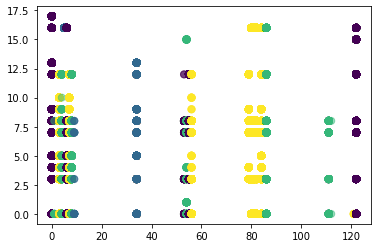

In [98]:
plt.scatter(data['Region'], data['Vaccine'], c=y_kmeans, s=50, cmap='viridis',alpha=.5)
